In [1]:
import pandas as pd

In [2]:
df_vist = pd.read_csv('Hospital Outpatient Data_NH_cleaned.zip')

In [12]:
df_vist.head()

,Patient_ID,Age,Gender,Diagnosis,Has_Insurance,Postcode,Total_Cost,Registration Minutes,Nursing Minuts,Laboratory Minutes,Consultation Minutes,Pharmacy Minutes
Visit_Date,,,,,,,,,,,,
2020-05-06,688923,68,Female,Diabetes,True,20006,2274.0,33,105,101,28,112
2018-08-04,886361,62,Female,Urinary Tract Infection,False,20005,3430.0,46,75,84,102,36
2021-04-10,464823,70,Female,Upper Respiratory Tract Infection,True,10003,1836.0,107,81,5,77,36
2021-10-01,655214,8,Female,Upper Respiratory Tract Infection,False,10006,3250.0,66,31,101,35,92
2018-04-30,454666,24,Male,Malaria,True,10006,2262.0,68,55,60,90,104


In [5]:
df_vist['Visit_Date']= pd.to_datetime(df_vist['Visit_Date'])

In [9]:
type(df_vist['Visit_Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [10]:
df_vist.set_index(['Visit_Date'],inplace=True)

In [13]:
df_resampled_year = df_vist.resample('Y').count()

In [14]:
df_resampled_year

,Patient_ID,Age,Gender,Diagnosis,Has_Insurance,Postcode,Total_Cost,Registration Minutes,Nursing Minuts,Laboratory Minutes,Consultation Minutes,Pharmacy Minutes
Visit_Date,,,,,,,,,,,,
2018-12-31,200016,200016,200016,200016,200016,200016,200016,200016,200016,200016,200016,200016
2019-12-31,200260,200260,200260,200260,200260,200260,200260,200260,200260,200260,200260,200260
2020-12-31,200784,200784,200784,200784,200784,200784,200784,200784,200784,200784,200784,200784
2021-12-31,199663,199663,199663,199663,199663,199663,199663,199663,199663,199663,199663,199663
2022-12-31,199277,199277,199277,199277,199277,199277,199277,199277,199277,199277,199277,199277


In [15]:
import matplotlib.pyplot as plt

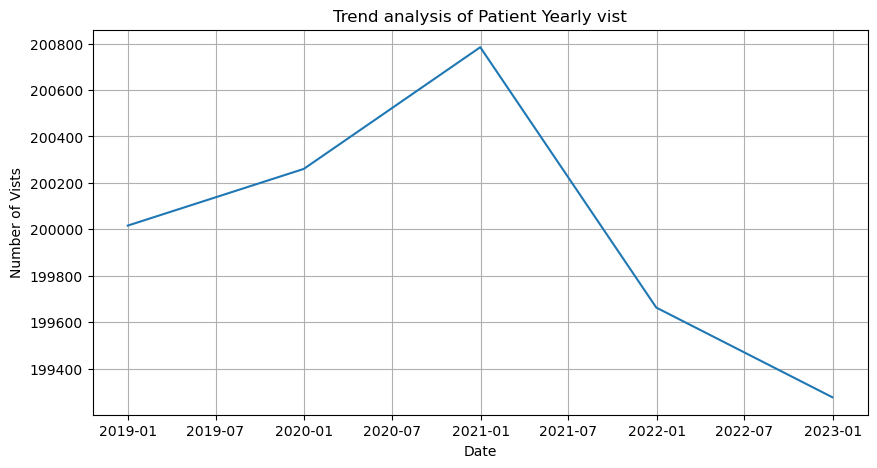

In [29]:
plt.figure(figsize=(10,5))
plt.plot(df_resampled_year.index,df_resampled_year['Patient_ID'])
plt.title('Trend analysis of Patient Yearly vist' )
plt.xlabel('Date')
plt.ylabel('Number of Vists')
plt.grid(True)
plt.show() 


In [26]:
 = df_vist.resample('M').count()

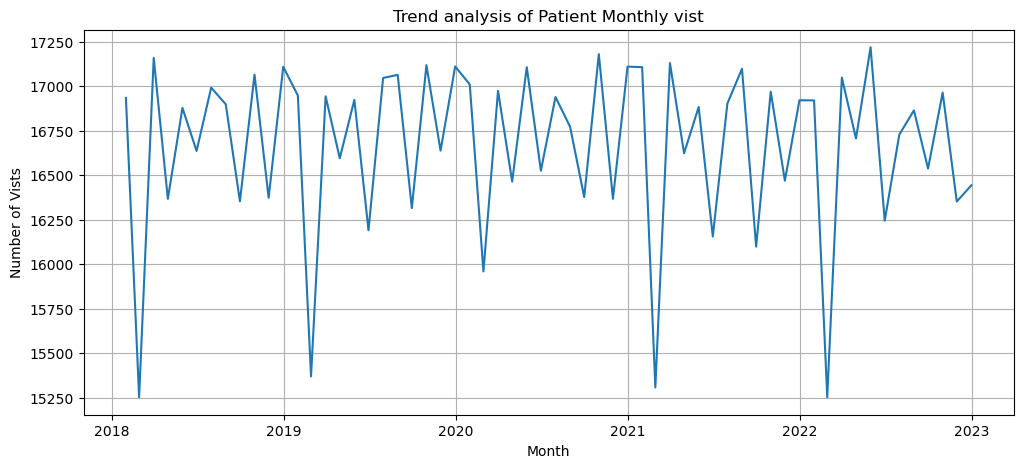

In [31]:
plt.figure(figsize=(12,5))
plt.plot(df_resampled_month.index,df_resampled_month['Patient_ID'])
plt.title('Trend analysis of Patient Monthly vist' )
plt.xlabel('Month')
plt.ylabel('Number of Vists')
plt.grid(True)
plt.show() 

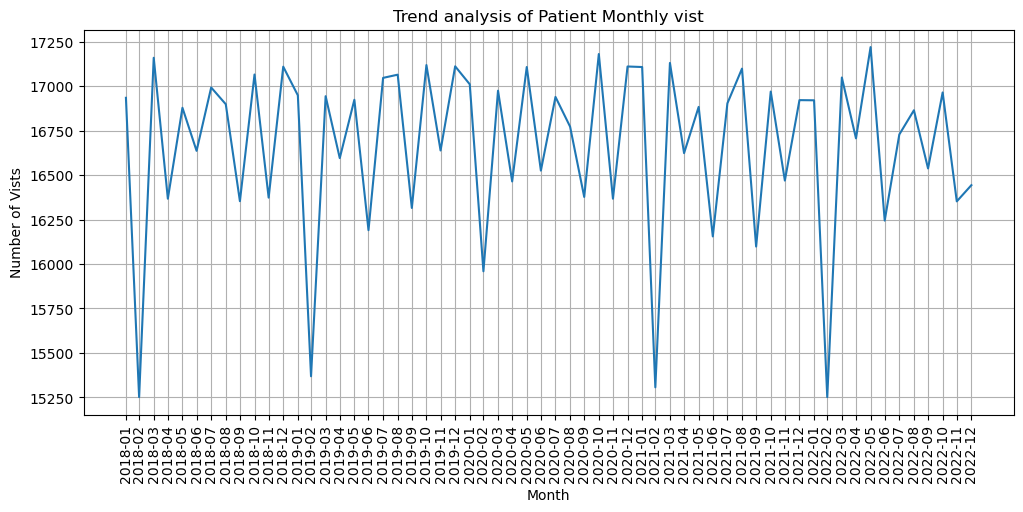

In [32]:
monthly_ticks = pd.date_range(start=df_resampled_month.index.min(),end = df_resampled_month.index.max(),freq='M')
monthly_lables = [date.strftime('%Y-%m') for date in monthly_ticks]


plt.figure(figsize=(12,5))
plt.plot(df_resampled_month.index,df_resampled_month['Patient_ID'])
plt.title('Trend analysis of Patient Monthly vist' )
plt.xticks(monthly_ticks,monthly_lables,rotation=90)
plt.xlabel('Month')
plt.ylabel('Number of Vists')
plt.grid(True)
plt.show() 

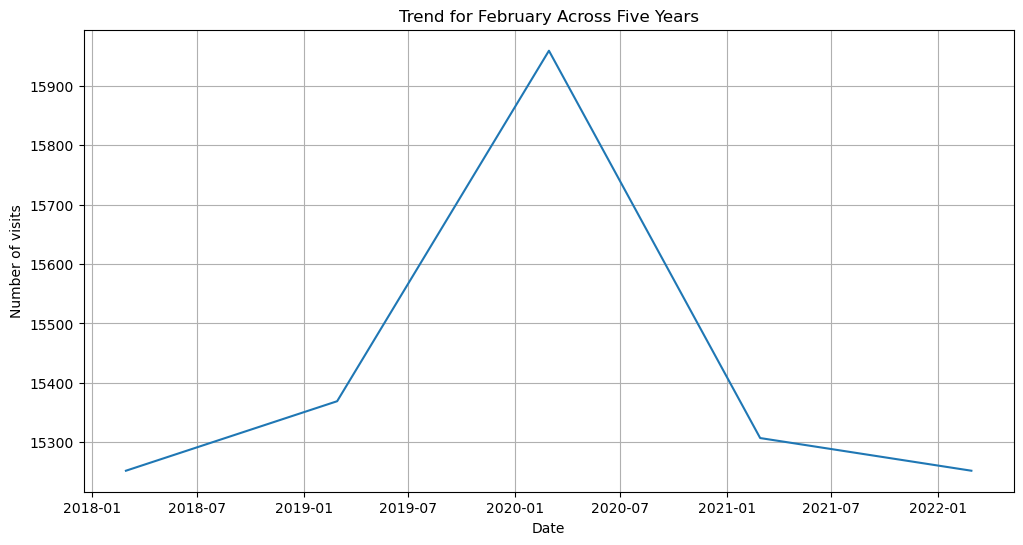

In [41]:

target_month = 2
df_target_month = df_resampled_month[df_resampled_month.index.month == target_month]

plt.figure(figsize=(12, 6))
plt.plot(df_target_month.index, df_target_month['Postcode'])
plt.title(f'Trend for {df_target_month.index[0].strftime("%B")} Across Five Years')  # Access the first element using square brackets
plt.xlabel('Date')  # Corrected typo: 'xlabel' instead of 'xlabal'
plt.ylabel('Number of visits')
plt.grid(True)
plt.show()
